# MID TERM PROJECT - CAB BOOKING SYSTEM

Back Ground:

Cab booking system is the process where renting a cab is automated through an app 
throughout a city. Using this app, people can book a cab from one location to another location. 
Being a cab booking app company, exploiting the understanding of cab supply and demand 
could increase the efficiency of their service and enhance user experience by minimizing 
waiting time.
Objective of this project is to combine historical usage pattern along with the open data sources 
like weather data to forecast cab booking demand in a city.

Process Flow:

You will be provided with hourly renting data span of two years. Data is randomly divided into 
train and test set. You must predict the total count of cabs booked in each hour covered by the 
test set, using the information available prior to the booking period. You need to append the 
train_label dataset to train.csv as ‘Total_booking’ column.

Descriptions of the columns:

datetime - hourly date + timestamp 
season - spring, summer, autumn, winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
Total_booking - number of total booking

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as DT
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures #for preprocessing the data
from sklearn.linear_model import LinearRegression #regression model
from sklearn.model_selection import train_test_split #for splitting the dataset for score
from sklearn.linear_model import LogisticRegression #regression model
from sklearn.metrics import r2_score #score of regression model 
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

## Import Dataset

In [3]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")
train_label = pd.read_csv("Dataset/train_label.csv")
test_label = pd.read_csv("Dataset/test_label.csv")

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [5]:
train.shape

(8708, 9)

There are 8708 rows and 9 features 

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [7]:
train_label.head()

,504
0,5
1,139
2,209
3,184
4,791


In [8]:
test_label.head()

,256
0,87
1,11
2,84
3,668
4,53


### Adding train_label Dataset to Train Dataset

In [9]:
train_labels_list = [504] + list(train_label['504'])
if 'Total_Cab_Bookings' not in list(train.columns):
    train['Total_Cab_Bookings'] = train_labels_list 

In [10]:
#return datatypes of columns
train.dtypes

datetime               object
season                 object
holiday                 int64
workingday              int64
weather                object
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
Total_Cab_Bookings      int64
dtype: object

### Adding test_label Dataset to Test Dataset


In [11]:
test_labels_list = [256] + list(test_label['256'])
if 'Total_Cab_Bookings' not in list(test.columns):
    test['Total_Cab_Bookings'] = test_labels_list 

In [12]:
test.dtypes

datetime               object
season                 object
holiday                 int64
workingday              int64
weather                object
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
Total_Cab_Bookings      int64
dtype: object

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [14]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [15]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Cab_Bookings
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


From the above values:
- The holiday and workingday columns are ignored because they are encoded values 
- Temperature mean value is 20.24 C
- atemp mean value is 23.65 C which is approximately 3 C higher than actual temperature. Here atemp 
  means real feeling of the temperature


### Dividing datetime column into WeekDay, Day, Time, Month, Year in train dataset 


#### Here a copy of train and test dataset is made, so that the orginal data set is not disturbed whenchanges are made to the data

In [16]:
#In train data
df = train.copy()
df['datetime'] = pd.to_datetime(df['datetime'])
datetime_list = ['WeekDay','Day','Time','Month','Year']
df['WeekDay'] = df['datetime'].apply(lambda x: x.strftime('%A'))
df['Day'] = df['datetime'].apply(lambda x: x.strftime('%d'))
df['Time'] = df['datetime'].apply(lambda x: x.strftime('%X'))
df['Month'] = df['datetime'].apply(lambda x: x.strftime('%B'))
df['Year'] = df['datetime'].apply(lambda x: x.strftime('%Y'))




In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,Wednesday,02,19:00:00,May,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,Wednesday,05,04:00:00,September,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,Thursday,13,09:00:00,January,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,Friday,18,16:00:00,November,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,Tuesday,13,13:00:00,September,2011


### Dividing datetime column into WeekDay, Day, Time, Month, Year in test dataset 


In [18]:
#In test data
test_df = test.copy()
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
datetime_list = ['WeekDay','Day','Time','Month','Year']
test_df['WeekDay'] = test_df['datetime'].apply(lambda x: x.strftime('%A'))
test_df['Day'] = test_df['datetime'].apply(lambda x: x.strftime('%d'))
test_df['Time'] = test_df['datetime'].apply(lambda x: x.strftime('%X'))
test_df['Month'] = test_df['datetime'].apply(lambda x: x.strftime('%B'))
test_df['Year'] = test_df['datetime'].apply(lambda x: x.strftime('%Y'))

In [19]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,Thursday,10,11:00:00,May,2012
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,Saturday,09,07:00:00,June,2012
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,Sunday,06,20:00:00,March,2011
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,Thursday,13,11:00:00,October,2011
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,Saturday,02,12:00:00,June,2012


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2178 non-null   datetime64[ns]
 1   season              2178 non-null   object        
 2   holiday             2178 non-null   int64         
 3   workingday          2178 non-null   int64         
 4   weather             2178 non-null   object        
 5   temp                2178 non-null   float64       
 6   atemp               2178 non-null   float64       
 7   humidity            2178 non-null   int64         
 8   windspeed           2178 non-null   float64       
 9   Total_Cab_Bookings  2178 non-null   int64         
 10  WeekDay             2178 non-null   object        
 11  Day                 2178 non-null   object        
 12  Time                2178 non-null   object        
 13  Month               2178 non-null   object      

In [21]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Cab_Bookings
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


## EDA and Visualizations

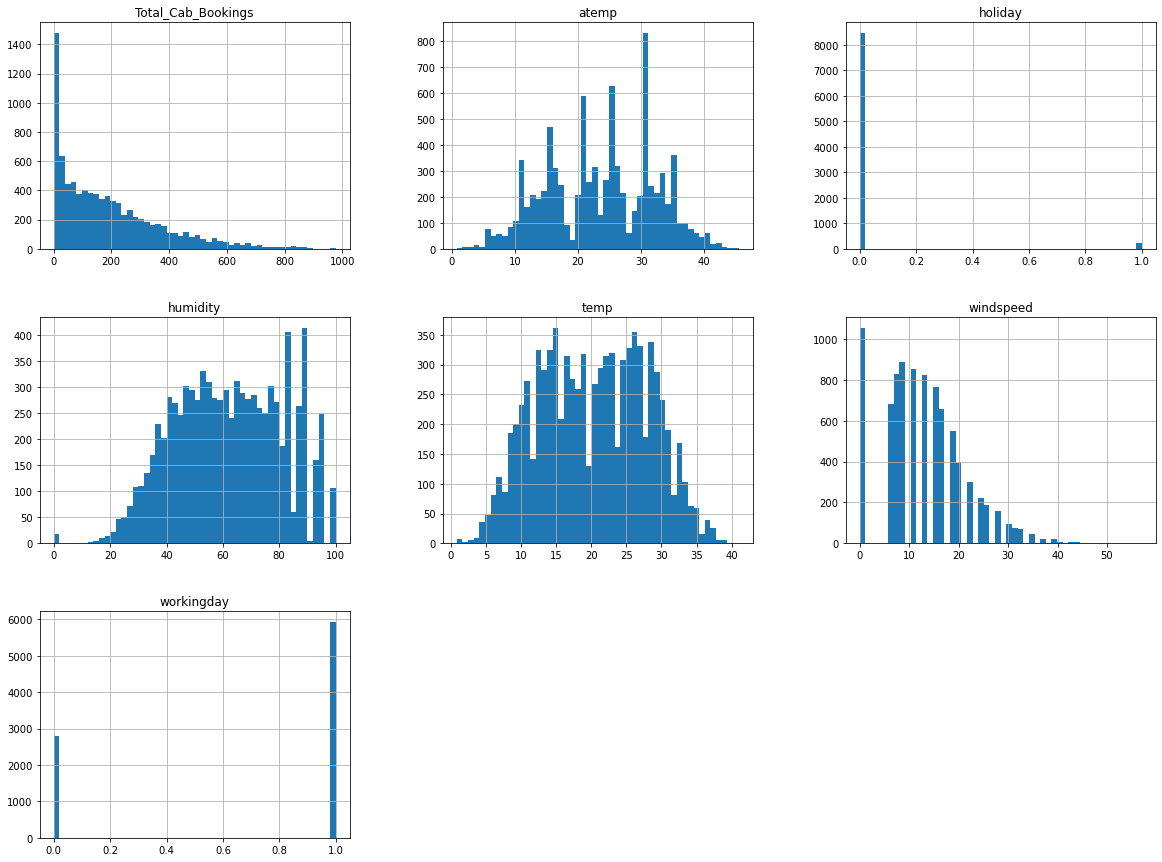

In [22]:
import matplotlib.pyplot as ply
df.hist(bins = 50,figsize = (20,15))
plt.show()

### Weathers observed in various Seasons


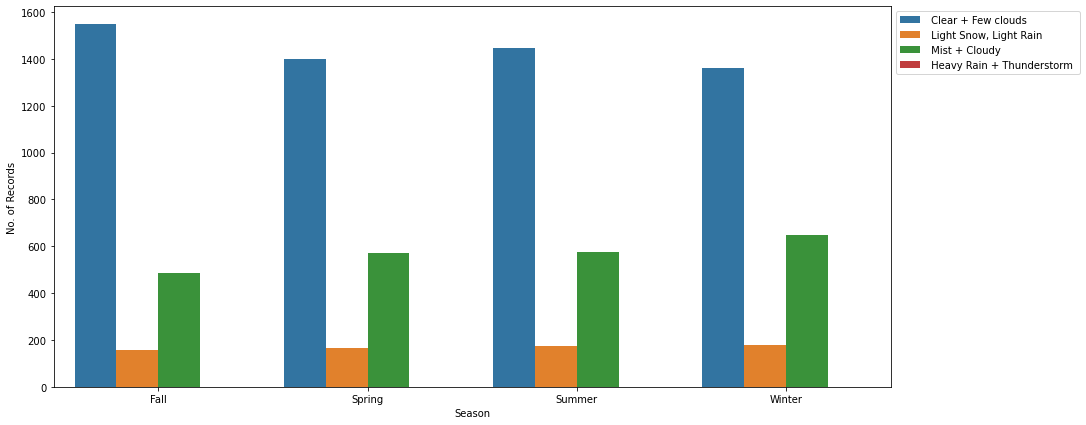

In [23]:
weather_season_df = df[['weather','season']]
weather_list = []
count_list = []
season_list = []
for season, weather_df in weather_season_df.groupby('season'):
    weather_count_dict = weather_df.groupby('weather').count()['season'].to_dict()
    keys = list(weather_count_dict.keys())
    weather_list.extend(keys)
    values = list(weather_count_dict.values())
    count_list.extend(values)
    season_list.extend([season]*len(keys))
weather_season_df = pd.DataFrame({'Season':season_list,'No. of Records':count_list,'Weather Type':weather_list})
#Plotting bar graph
plt.figure(figsize=(15,7))
sns.barplot(data = weather_season_df,x='Season',y='No. of Records',hue='Weather Type')
plt.legend(bbox_to_anchor=(1,1))

It appears that the most frequent weather observed in any season is Clear + Few clouds while Heavy Rain + Thunderstorm is rare phenomenon observed only during Spring. 

Data Analysis from the Season Vs graph:
- From the above bar plot we can tell the maximum number of bookings is in Fall season.
- Second Maximum number of bookings is in Summer season 
- We can say that maximum number of bookings is during Holidays
- We can also say that during Fall season people tend to go to workplaces in cabs hence the booking     is high
- We can ask the cab company to increase the number of cab services during Fall & Summer seasons

### Month vs total bookings

In [24]:
le = LabelEncoder()
month_df1 = df.copy()
month_df1['Month'] = month_df1['datetime'].apply(lambda x: x.strftime('%m'))

In [25]:

month_df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,Wednesday,02,19:00:00,05,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,Wednesday,05,04:00:00,09,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,Thursday,13,09:00:00,01,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,Friday,18,16:00:00,11,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,Tuesday,13,13:00:00,09,2011


In [26]:
month_df1.groupby(['Month']).sum()['Total_Cab_Bookings']

Month
01     63086
02     77963
03    108905
04    132588
05    161566
06    178391
07    174264
08    172371
09    172913
10    166361
11    141024
12    131273
Name: Total_Cab_Bookings, dtype: int64

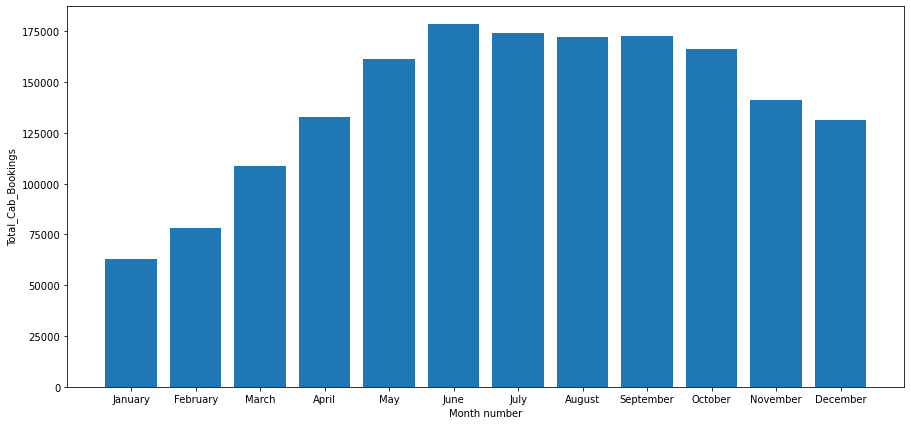

In [27]:
months_list=['January','February','March','April','May','June','July','August','September','October','November','December']
months = range(1,13)
plt.figure(figsize=(15,7))
plt.bar(months,month_df1.groupby(['Month']).sum()['Total_Cab_Bookings'])
plt.xticks(months,months_list)
plt.ylabel('Total_Cab_Bookings')
plt.xlabel('Month number')
plt.show()

Data Analysis from Month vs Total_Bookings:
- June month has highest number of bookings
- Least number of bookings is in January
- From May to June the number of bookings are more or less same

### Working day vs Non-Working day

In [28]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [29]:
workingday_df = df.copy()
workingday_df = workingday_df.loc[(workingday_df['workingday'] == 1)]
print("No. of Cab Booking durng working days: ",color.BOLD + str(workingday_df.sum()['Total_Cab_Bookings']) + color.END)

No. of Cab Booking durng working days:  1152431


In [30]:
non_workingday_df = df.copy()
non_workingday_df = non_workingday_df.loc[(non_workingday_df['workingday'] == 0)]
print("No. of Cab Booking durng working days: ",color.BOLD + str(non_workingday_df.sum()['Total_Cab_Bookings']) + color.END)

No. of Cab Booking durng working days:  528274


From the above data:
- Number of bookings during working days is more than non working days
- Majority of days in a year are working days so the number of bookings is more
- This may be due to people travelling more morning and evening for office work

#### Weather Vs Total Bookings: 


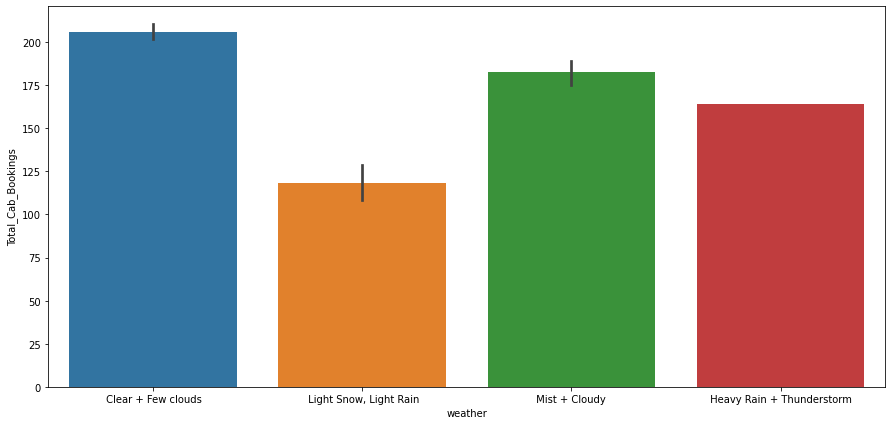

In [31]:
weather_df = df.copy()
plt.figure(figsize=(15,7))
sns.barplot(data = weather_df,x='weather',y='Total_Cab_Bookings')

Data Analysis from Weather Vs Total Bookings:
- Number of bookings when it is Clear+Few Clouds is more 
- Next max number of bookings is when it is Mist+Cloudy
- From the above two points - it might be because most of them don't go out when it is too cool or it is thundering + heavy rain 

### Effect of Time on Cab Bookings during working days

In [36]:
working_day = df[(df['holiday'] == 0)&(df['workingday'] == 1)][['Time','Total_Cab_Bookings']].sort_values(by='Time')
leaving_for_office_hrs = ['07:00:00','08:00:00']
office_hrs = ['09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00']
travelling_to_home_hrs = ['18:00:00','19:00:00','20:00:00','21:00:00']
sleeping_hrs = ['22:00:00','23:00:00','00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00']
cab_bookings_list = []
duration_category = []
for i in list(working_day['Time']):
    if i in leaving_for_office_hrs:
        duration_category.append("leaving for office")
    if i in office_hrs:
        duration_category.append("office time")
    if i in travelling_to_home_hrs:
        duration_category.append("travelling to home")
    if i in sleeping_hrs:
        duration_category.append("sleeping")
if 'duration_cat' not in list(working_day.columns):
    working_day['duration_cat'] = duration_category

In [37]:
working_day.head()

,Time,Total_Cab_Bookings,duration_cat
7602,00:00:00,33,sleeping
5079,00:00:00,35,sleeping
7959,00:00:00,26,sleeping
2887,00:00:00,12,sleeping
7957,00:00:00,42,sleeping


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

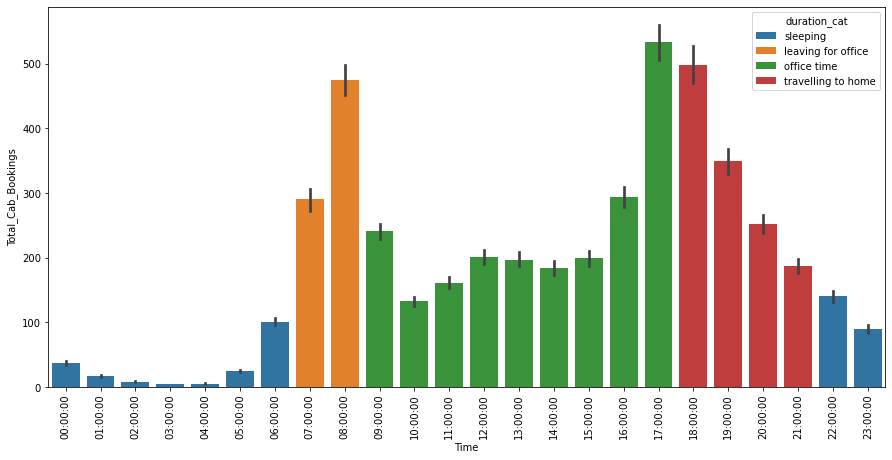

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(data = working_day, x = 'Time',y = 'Total_Cab_Bookings',hue='duration_cat',dodge=False)
plt.xticks(rotation=90)

Demands for cabs are lower during sleeping time durations while in other time durations demands are pretty high especially at 8:00, 17:00 and 18:00 time. A cab company can thus increase no. of cabs operating during going to home, leaving for office and at office hours and reduce it during sleeping hours 

### Effect of Time on Cab Bookings during non-working days

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

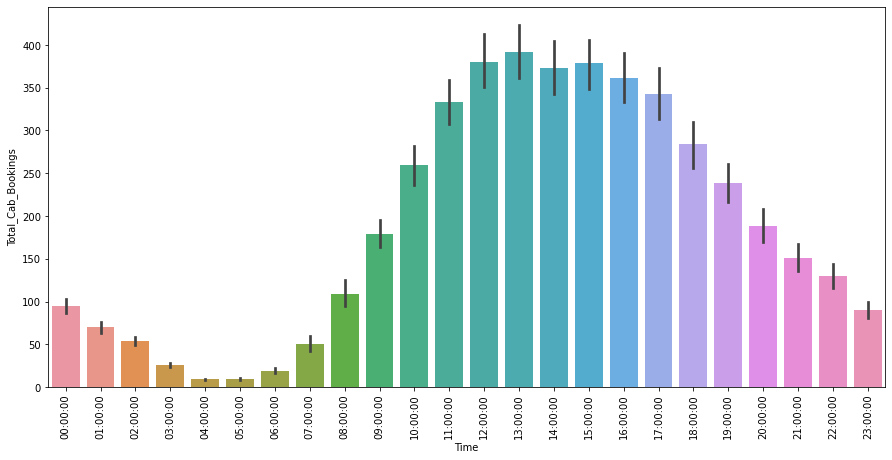

In [39]:
non_working_day = df[df['workingday'] == 0][['Time','Total_Cab_Bookings']].sort_values(by='Time')
plt.figure(figsize=(15,7))
sns.barplot(data=non_working_day,x='Time',y='Total_Cab_Bookings')
plt.xticks(rotation=90)

Cabs booking follow a perfect sinusoidal demand curve over the period of 24 hrs. Unlike normal working days where demand for cabs reaches peak in the early morning and evening time. Here, we see that peak demand is reached at later in the day, and remains consistent in the afternoon time between 12-5pm. This can be because since it's an off-day, people might wake up late, go for city tours or travel to picnics, malls during the afternoon time.  

### Monthly comparison Year-wise on the number of Cab Bookings  


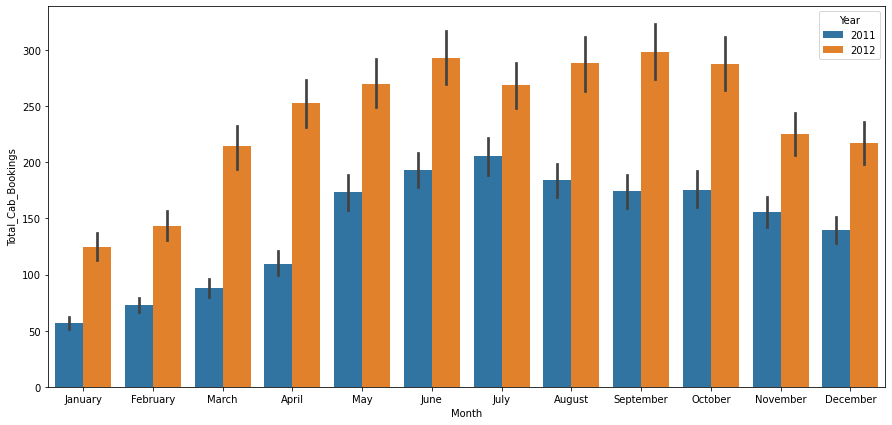

In [40]:
def month_val(month):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    return month_dict[month]
month_df = df.copy()
month_df['Month_val']= month_df['Month'].apply(lambda x:month_val(x))
plt.figure(figsize=(15,7))
sns.barplot(data = month_df.sort_values(by='Month_val'), x = 'Month',y = 'Total_Cab_Bookings',hue='Year')


An approximate 1.5-2x increase in no. of bookings in each month of the year. A general trend is observed here that number of cab gradually increases, reaches peak during mid-year and gradually decreases as it nears the end of the year. This can be explained due to Summer Vacations that happens during the mid-year (May - July), hence resulting in gradual rise in bookings and as the Vacations ends, people resume back to work thus gradually decrasing afterwards. 

### Season Vs Total bookings

In [41]:
le = LabelEncoder()
season_df = df.copy()
season_df['seasons']=le.fit_transform(season_df.season.values)

#plt.figure(figsize=(10,5))
#sns.barplot(data = df,x = 'season',y = 'Total_Cab_Bookings')


In [42]:
season_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year,seasons
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,Wednesday,02,19:00:00,May,2012,2
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,Wednesday,05,04:00:00,September,2012,0
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,Thursday,13,09:00:00,January,2011,1
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,Friday,18,16:00:00,November,2011,3
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,Tuesday,13,13:00:00,September,2011,0


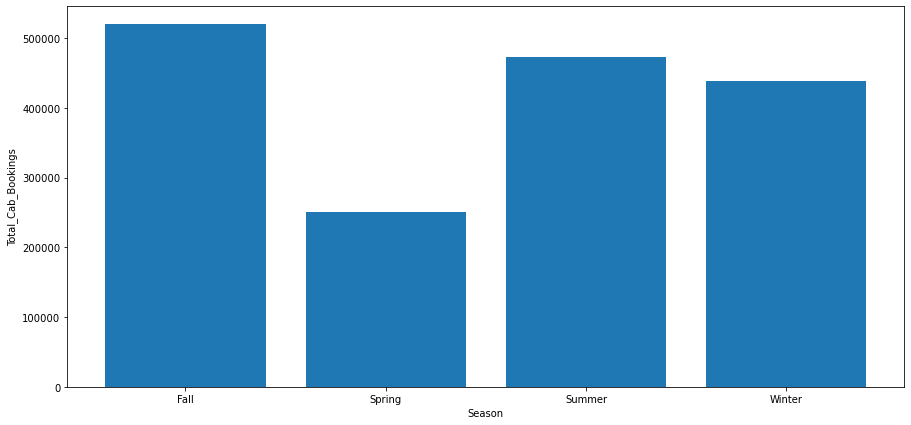

In [43]:
seasons_list = ['Fall','Spring','Summer','Winter']
s = range(0,4)
plt.figure(figsize=(15,7))
plt.bar(s,season_df.groupby(['seasons']).sum()['Total_Cab_Bookings'])
plt.xticks(s,seasons_list)
plt.ylabel('Total_Cab_Bookings')
plt.xlabel('Season')
plt.show()

During Summer and Fall Car bookings are more across two years. Hence, Summer and Fall are the periods seeing higher surge in Cab Bookings due to Vacations.

### Effect of feels-like temperature and actual temperature absolute difference on Cab bookings 

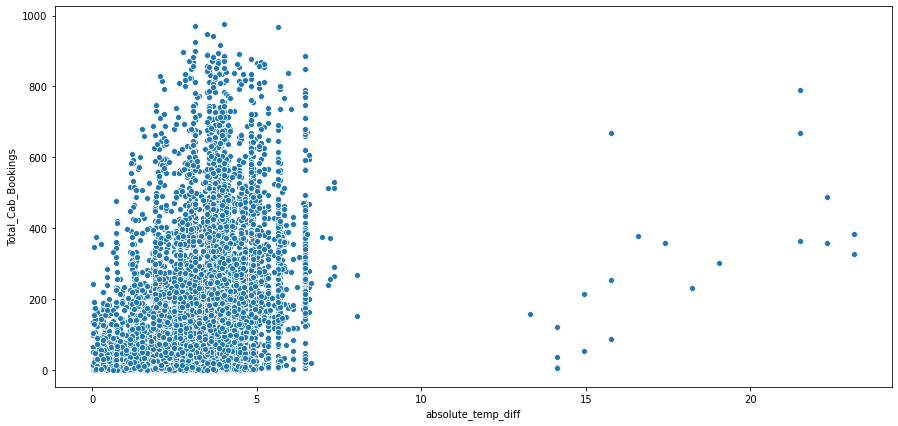

In [44]:
temp_df = df[['temp','atemp','Total_Cab_Bookings']]
temp_df['absolute_temp_diff'] = np.abs(temp_df['atemp'] - temp_df['temp'])
plt.figure(figsize=(15,7))
sns.scatterplot(data=temp_df,x='absolute_temp_diff',y='Total_Cab_Bookings')

Having a lower absolute temperature difference between 0-7.5 units is favourable as majority of Cab Bookings have taken place in this region. Higher absolute temperature difference is associated with very fewer bookings. 

### Effects of Humidity and Weather on Cab Bookings 

In [45]:
weather = df[['weather','Total_Cab_Bookings']]
weatherlist = list(set(weather_df['weather']))
weather_count_list = []
for i in weatherlist:
    weather_count_list.append(len(df[df['weather']==i]))
pd.DataFrame({'weather':weatherlist,'weather_count':weather_count_list})

,weather,weather_count
0,Clear + Few clouds,5753
1,"Light Snow, Light Rain",678
2,Heavy Rain + Thunderstorm,1
3,Mist + Cloudy,2276


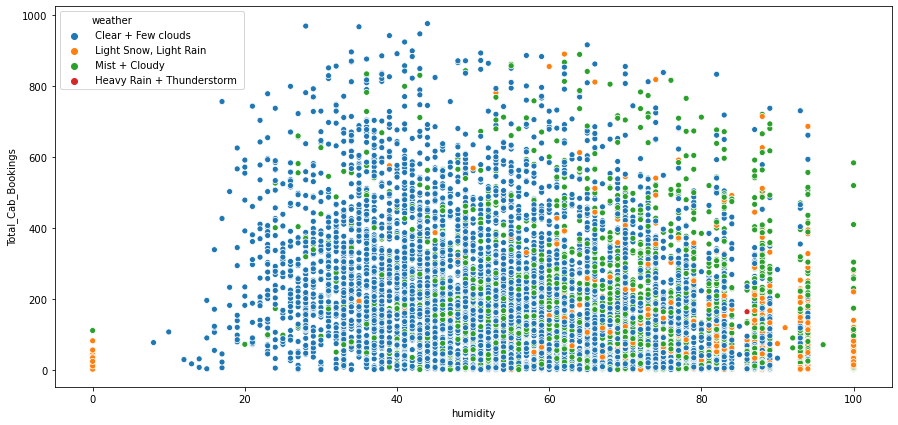

In [46]:
humidity = df[['humidity','weather','Total_Cab_Bookings']]
plt.figure(figsize=(15,7))
sns.scatterplot(data = humidity,x='humidity',y='Total_Cab_Bookings',hue='weather')

Humidity appears to have little to no effect as people are booking cabs over large ranges of Humidity. It also appears that most of the Cab Bookings have taken place during Clear + Few Clouds, Mist + Cloudy weather. Makes sense because we can see in the above data that very few records are available for Light to Heavy rain, especially Heavy rain/thunderstorm since it's a rare phenomenon.  

### Effects of  Windspeed on Cab Bookings

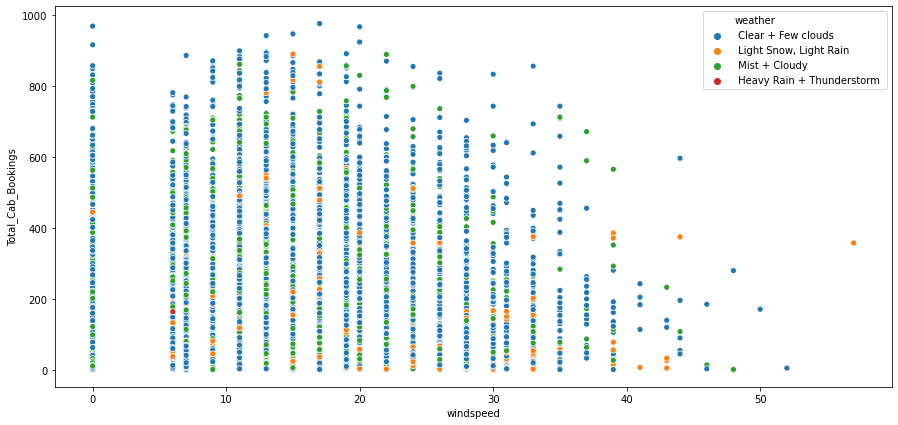

In [47]:
windspeed = df.copy()
plt.figure(figsize=(15,7))
sns.scatterplot(data = windspeed,x='windspeed',y='Total_Cab_Bookings',hue='weather')
plt.rcParams['figure.figsize'] = (20,5)

Here, windspeed also appears to have little to no correlation on Cab Bookings

## Outlier Treatment

#### Before Outlier Treatment 


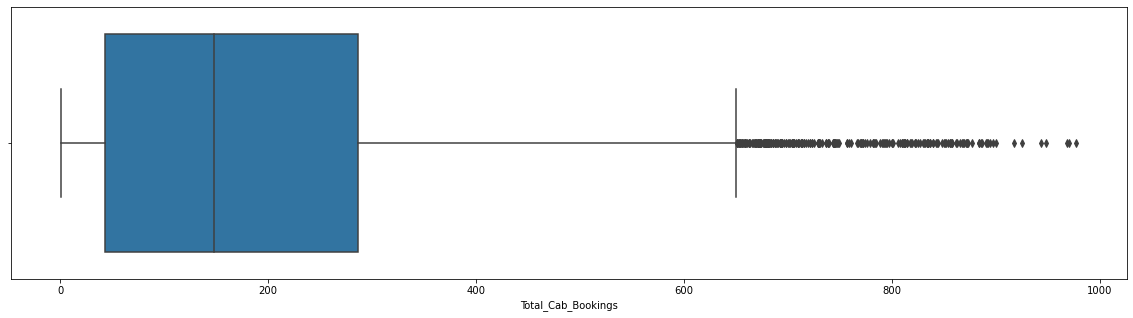

In [48]:
#For train data

plot_data = sns.boxplot(x = df['Total_Cab_Bookings'])


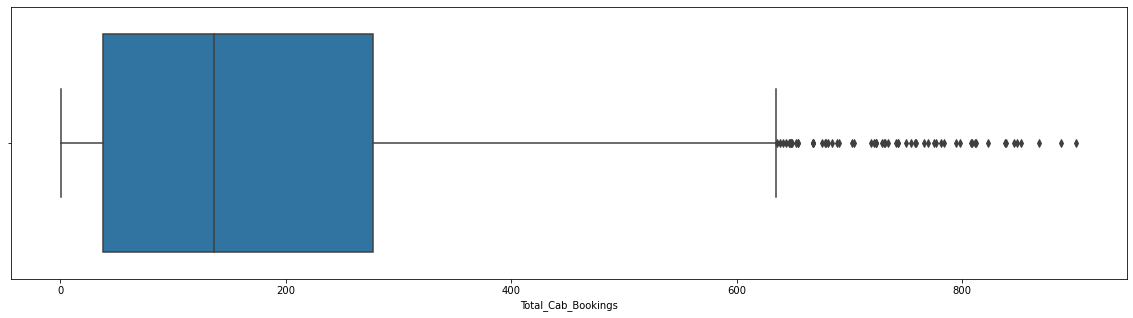

In [49]:
#For test data
sns.boxplot(x = test_df['Total_Cab_Bookings'])

### Method 1: Transformation


Frequency distribution plot is visualized. Generally, regression models perform well on balanced(non - skewed) and normally distributed data. This skewness is caused due to presence of outliers.  

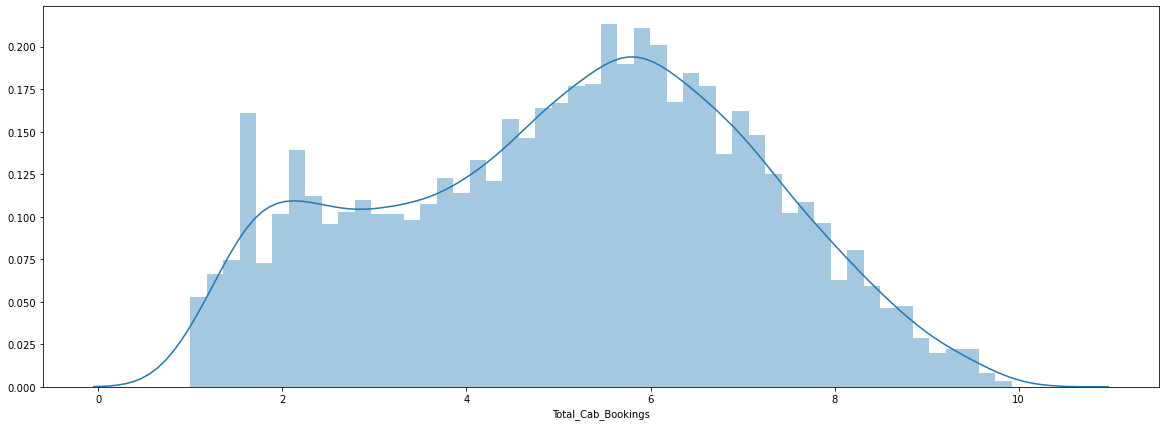

In [50]:
#For train data
plt.figure(figsize=(20,7))
sns.distplot(np.cbrt(df['Total_Cab_Bookings']),bins=50)

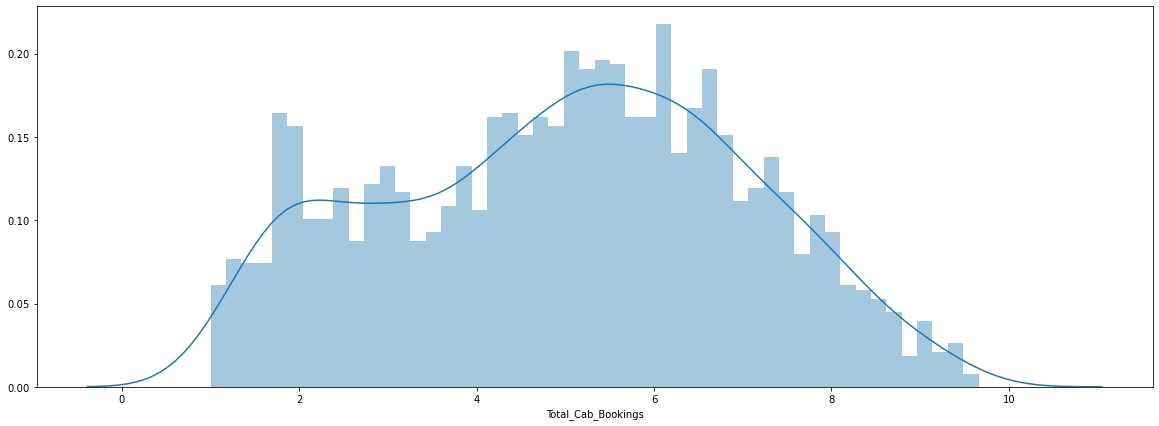

In [51]:
#For test data
plt.figure(figsize=(20,7))
sns.distplot(np.cbrt(test_df['Total_Cab_Bookings']),bins=50)

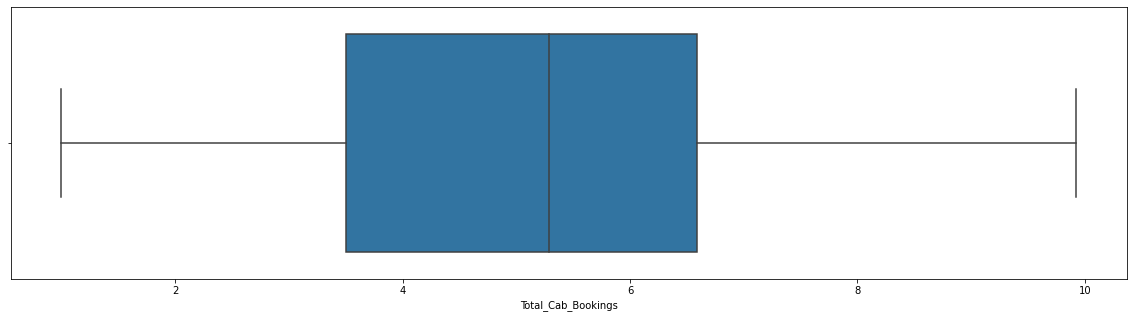

In [52]:
#For train data
plot_data = sns.boxplot(x = np.cbrt(df['Total_Cab_Bookings']))

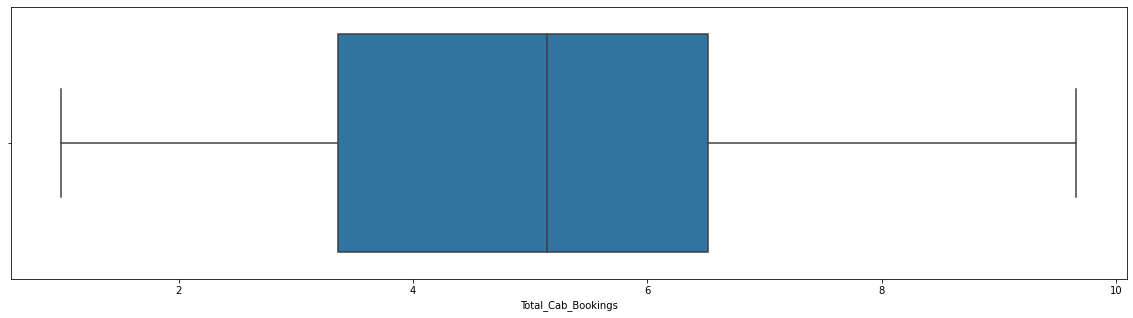

In [53]:
#For test data
sns.boxplot(x = np.cbrt(test_df['Total_Cab_Bookings']))

We see that outliers are removed after transforming the target variable

In [54]:
new_train = df.copy()
new_train['Total_Cab_Bookings'] = np.cbrt(new_train['Total_Cab_Bookings']) 

### Method 2: Removing Outliers through IQR Method


In the before transformation method, We see that above 600, the values are an outliers that can negatively impact the regression models. Through hit and trial, it was observed that below 608 for train data and below 590 for test data, we obtain a clean boxplot.

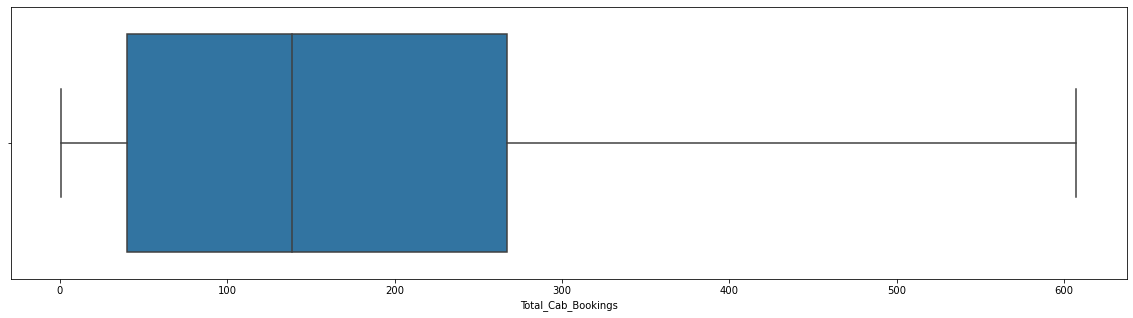

In [55]:
#For train data
plot_data = sns.boxplot(x = df[df['Total_Cab_Bookings']<608]['Total_Cab_Bookings'])

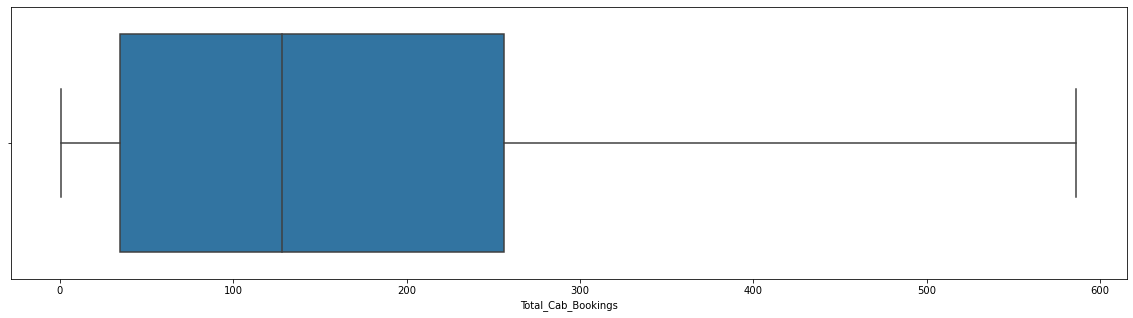

In [56]:
#For test data
sns.boxplot(x = test_df[test_df['Total_Cab_Bookings']<590]['Total_Cab_Bookings'])

In [57]:
new_train = df[df['Total_Cab_Bookings']<608]
new_test = test_df[test_df['Total_Cab_Bookings']<590]

## So Which one to choose here?
Both the above methods are good for removing outliers to help provide better predictions in the model. Here Method 1: Transformation is preferred because it doesn't result in the loss of data like Method 2, which can cause underfitting on the test data, both of which are against our objectives 

In [58]:
train_outlier = df.copy()
train_outlier['Total_Cab_Bookings'] = np.cbrt(train_outlier['Total_Cab_Bookings']) 
test_outlier = test_df.copy()
test_outlier['Total_Cab_Bookings'] = np.cbrt(test_outlier['Total_Cab_Bookings'])

## Missing Value Treatment

In [59]:
train_outlier.isnull().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
Total_Cab_Bookings    0
WeekDay               0
Day                   0
Time                  0
Month                 0
Year                  0
dtype: int64

In [60]:
test_outlier.isnull().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
Total_Cab_Bookings    0
WeekDay               0
Day                   0
Time                  0
Month                 0
Year                  0
dtype: int64

In [61]:
train_outlier.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
Total_Cab_Bookings    0
WeekDay               0
Day                   0
Time                  0
Month                 0
Year                  0
dtype: int64

In [62]:
test_outlier.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
Total_Cab_Bookings    0
WeekDay               0
Day                   0
Time                  0
Month                 0
Year                  0
dtype: int64

As datasets does not have null values or missing values, the is no need for missing value treatment

## Correlation Analysis

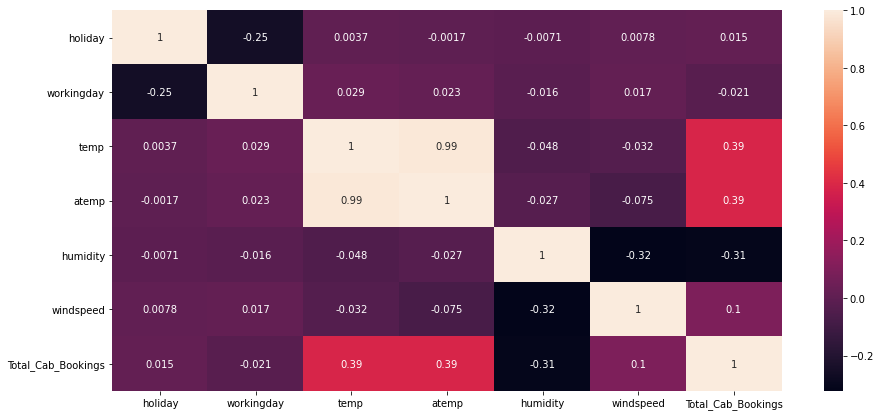

In [63]:
plt.figure(figsize=(15,7))
sns.heatmap(new_train.corr(),annot = True)

In [64]:
def weekday_val(weekday):
    weekday_dict = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
    return weekday_dict[weekday]
def month_val(month):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    return month_dict[month]
#For train data
train_outlier['Month'] = train_outlier['Month'].apply(lambda x:month_val(x))
train_outlier['WeekDay'] = train_outlier['WeekDay'].apply(lambda x:weekday_val(x))
train_outlier['weather'] = LabelEncoder().fit_transform(train_outlier['weather'])
train_outlier['season'] = LabelEncoder().fit_transform(train_outlier['season'])
train_outlier['Hour'] = train_outlier['Time'].apply(lambda x:int(x[:2]))
#For test data
test_outlier['Month'] = test_outlier['Month'].apply(lambda x:month_val(x))
test_outlier['WeekDay'] = test_outlier['WeekDay'].apply(lambda x:weekday_val(x))
test_outlier['weather'] = LabelEncoder().fit_transform(test_outlier['weather'])
test_outlier['season'] = LabelEncoder().fit_transform(test_outlier['season'])
test_outlier['Hour'] = test_outlier['Time'].apply(lambda x:int(x[:2]))

In [67]:
#Checking the transformed Data
train_outlier.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year,Hour
0,2012-05-02 19:00:00,2,0,1,0,22.14,25.760,77,16.9979,7.958114,2,02,19:00:00,5,2012,19
1,2012-09-05 04:00:00,0,0,1,0,28.70,33.335,79,19.0012,1.709976,2,05,04:00:00,9,2012,4
2,2011-01-13 09:00:00,1,0,1,0,5.74,6.060,50,22.0028,5.180101,3,13,09:00:00,1,2011,9
3,2011-11-18 16:00:00,3,0,1,0,13.94,16.665,29,8.9981,5.934472,4,18,16:00:00,11,2011,16
4,2011-09-13 13:00:00,0,0,1,0,30.34,33.335,51,19.0012,5.687734,1,13,13:00:00,9,2011,13


In [68]:
test_outlier.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Cab_Bookings,WeekDay,Day,Time,Month,Year,Hour
0,2012-05-10 11:00:00,2,0,1,0,21.32,25.000,48,35.0008,6.349604,3,10,11:00:00,5,2012,11
1,2012-06-09 07:00:00,2,0,0,0,23.78,27.275,64,7.0015,4.431048,5,09,07:00:00,6,2012,7
2,2011-03-06 20:00:00,1,0,0,1,11.48,12.120,100,27.9993,2.223980,6,06,20:00:00,3,2011,20
3,2011-10-13 11:00:00,3,0,1,2,25.42,28.790,83,0.0000,4.379519,3,13,11:00:00,10,2011,11
4,2012-06-02 12:00:00,2,0,0,0,25.42,31.060,43,23.9994,8.741625,5,02,12:00:00,6,2012,12


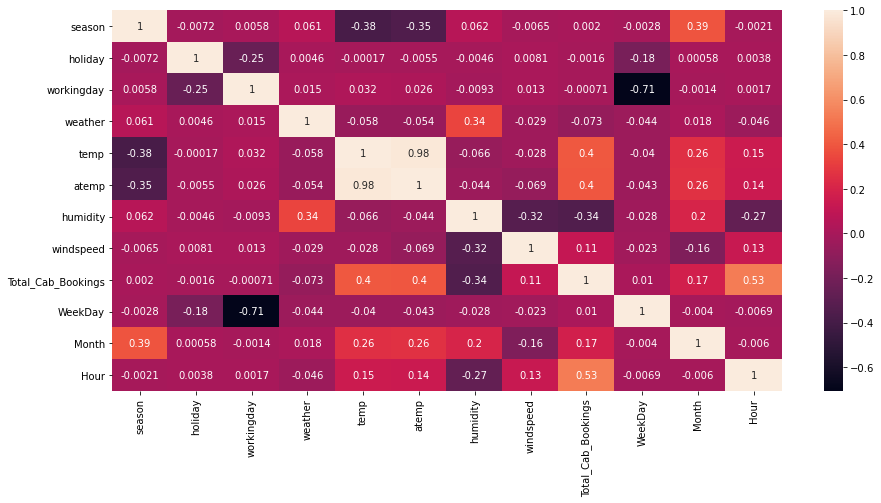

In [69]:
plt.figure(figsize=(15,7))
sns.heatmap(train_outlier.corr(),annot=True)

## Feature Engineering

From the heat map we take the features whose first two both decimal places are not zero.
The selected
features are: **Hour**, **temp**, **Month**, **humidity**, **windspeed**, **atemp**, **windspeed**, **WeekDay**, **weather**. 

In [113]:
X_Train = train_outlier[['Hour','temp','Month','humidity','windspeed','atemp','windspeed','WeekDay','weather']]
Y_Train = train_outlier['Total_Cab_Bookings']
X_Test = test_outlier[['Hour','temp','Month','humidity','windspeed','atemp','windspeed','WeekDay','weather']]
Y_Test = test_outlier['Total_Cab_Bookings']

## Model Selection, Testing, Tuning & Boosting

In [71]:
def subsetselection(model,X_Train,Y_Train,X_Test,Y_Test):
  features = list(X_Train.columns)
  constantfeatures = features[:2]
  model.fit(X_Train,Y_Train)
  initial_score = r2_score(Y_Test,model.predict(X_Test))
  featurestotest = features[2:]
  select_features = features.copy()
  while(featurestotest!=[]):
    feature_difference_dictionary = {}  
    for i in featurestotest:
        select_features.remove(i)
        model.fit(X_Train[select_features],Y_Train)
        score = r2_score(Y_Test, model.predict(X_Test[select_features]))
        diff = score - initial_score
        select_features.append(i)
        feature_difference_dictionary[i] = diff
    keys = list(feature_difference_dictionary.keys())
    values = list(feature_difference_dictionary.values())
    if(max(values)>=0):
        best_feature = keys[values.index(max(values))]
        initial_score += feature_difference_dictionary[best_feature]
        select_features.remove(best_feature)
        featurestotest.remove(best_feature)
    else:
        break
  return select_features

###  GridSearch to find optimal model parameters  

In [115]:
#List of selected features for each model 
features_list = []

#### Linear Regression

In [116]:
linear_regression = LinearRegression()
features = subsetselection(linear_regression,X_Train,Y_Train,X_Test,Y_Test)
features_list.append(features)

#### Random Forest

In [117]:
rf = RandomForestRegressor()
param = {'n_estimators':[100],'random_state':list(range(11)),'max_features':[1,2,3,4,5,6,7,8,9]}
rf_gridsearch = GridSearchCV(rf,param_grid=param,n_jobs=-1,cv=5)
features = subsetselection(rf,X_Train,Y_Train,X_Test,Y_Test)
features_list.append(features)
rf_gridsearch.fit(X_Test[features],Y_Test)
rf_gridsearch.best_params_

{'max_features': 7, 'n_estimators': 100, 'random_state': 10}

#### Support Vector Machine

In [118]:
svr = SVR(kernel='rbf')
param = {'kernel':['rbf'],'gamma':[0.01,0.1,1],'C':[0.01,0.1,1,10]}
svr_gridsearch = GridSearchCV(svr,param_grid = param,n_jobs=-1,cv=5)
features = subsetselection(svr,X_Train,Y_Train,X_Test,Y_Test)
features_list.append(features)
svr_gridsearch.fit(X_Test[features],Y_Test)
svr_gridsearch.best_params_


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#### Decision Tree

In [119]:
dtr = DecisionTreeRegressor()
param = {'max_features':[1,2,3,4,5,6,7,8,9],'random_state':list(range(11))}
dtr_gridsearch = GridSearchCV(dtr,param_grid = param,n_jobs=-1,cv=5)
features = subsetselection(dtr,X_Train,Y_Train,X_Test,Y_Test)
features_list.append(features)
dtr_gridsearch.fit(X_Test[features],Y_Test)
dtr_gridsearch.best_params_

{'max_features': 8, 'random_state': 2}

#### GradientBoosting Regression

In [120]:
gbr = GradientBoostingRegressor()
param = {'n_estimators':[50,100,200],'random_state':list(range(11)),'learning_rate':[0.01,0.1,1]}
gbr_gridsearch = GridSearchCV(gbr,param_grid = param,n_jobs=-1,cv=5)
features = subsetselection(gbr,X_Train,Y_Train,X_Test,Y_Test)
features_list.append(features)
gbr_gridsearch.fit(X_Test[features],Y_Test)
gbr_gridsearch.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 4}

#### Gridsearch Result

In [121]:
ran_for = RandomForestRegressor(max_features=9,n_estimators=100,random_state=10)
s_vector_Machnine = SVR(C=1,gamma=0.1,kernel='rbf')
D_tree = DecisionTreeRegressor(max_features=9,random_state=8)
Gradient_Boosting_reg = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 200, random_state = 1)

#### fitting with subset selection

In [122]:
models = [linear_regression,rf,svr,dtr,gbr]
for model,features in zip(models,features_list):
    model.fit(X_Train[features],Y_Train)

In [123]:
print("Features selected for models:")
print("Linear Regression:",features_list[0])
print("Random Forest Regression:",features_list[1])
print("Support Vector Regression:",features_list[2])
print("Decision Tree Regression:",features_list[3])
print("Gradient Boosting Regression:",features_list[4])

Features selected for models:
Linear Regression: ['Hour', 'temp', 'Month', 'humidity', 'atemp', 'WeekDay', 'weather']
Random Forest Regression: ['Hour', 'temp', 'Month', 'humidity', 'windspeed', 'WeekDay']
Support Vector Regression: ['Hour', 'temp', 'Month', 'WeekDay', 'weather']
Decision Tree Regression: ['Hour', 'temp', 'Month', 'humidity', 'windspeed', 'windspeed', 'WeekDay']
Gradient Boosting Regression: ['Hour', 'temp', 'Month', 'humidity', 'atemp', 'WeekDay']


In [124]:
models = [linear_regression,rf,svr,dtr,gbr]
r2_score_train_list = []
r2_score_test_list = []
modelname = ['LinearRegression','RandomForest','SVR','DecisionTree','GradientBoosting']
for model,name,feature in zip(models,modelname,features_list):
    test_r2_score = r2_score(model.predict(X_Test[feature]),Y_Test)
    train_r2_score = r2_score(model.predict(X_Train[feature]),Y_Train)
    r2_score_train_list.append(train_r2_score)
    r2_score_test_list.append(test_r2_score)
model_score_df = pd.DataFrame({'Model':modelname,'train_score':r2_score_train_list,'test_score':r2_score_test_list})
model_score_df

,Model,train_score,test_score
0,LinearRegression,-0.206075,-0.147737
1,RandomForest,0.986639,0.904922
2,SVR,0.452346,0.466222
3,DecisionTree,0.999916,0.838236
4,GradientBoosting,0.855480,0.859489


We see above that Ensemble Model Random Forest performs the best among the four models. Desicion Tree as always causes overfitting of train data, causes less score on test dataset. Linear Regression Model is performing very poorly due to underfitting, let us try improving its score by adding polynomial features.   

###  Optimal Polynomial Degree for Linear Regression to maximize the test R2-score  

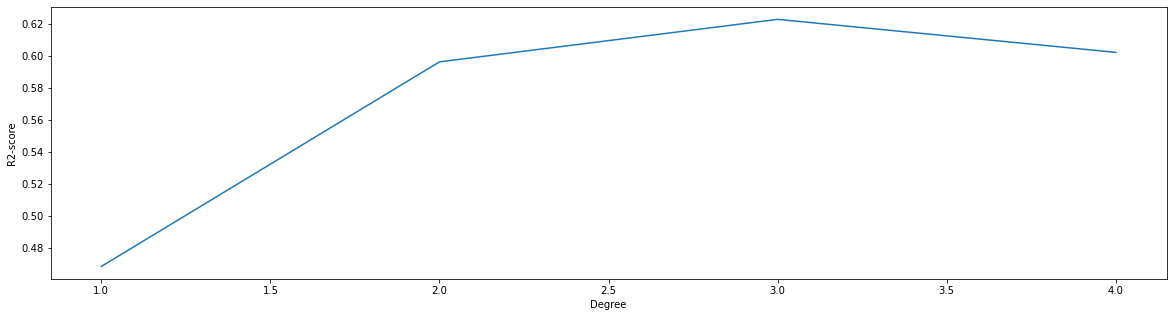

In [125]:
r2_score_list = []
deg_list = list(range(1,5))
for i in deg_list:
  lin_train = PolynomialFeatures(i).fit_transform(X_Train)
  linear_regression.fit(lin_train,Y_Train)
  lin_test = PolynomialFeatures(i).fit_transform(X_Test)
  r2score = r2_score(Y_Test,linear_regression.predict(lin_test))
  r2_score_list.append(r2score)
poly_linear_regression_df = pd.DataFrame({'R2-score':r2_score_list,'Degree':deg_list})
sns.lineplot(data=poly_linear_regression_df,x='Degree',y='R2-score')

 test R2-score starts falling after degree = 3. So, degree = 3 is chosen.


In [126]:
linear_train = PolynomialFeatures(3).fit_transform(X_Train)
linear_regression.fit(linear_train,Y_Train)
linear_test = PolynomialFeatures(3).fit_transform(X_Test)
test_r2score = r2_score(Y_Test,linear_regression.predict(linear_test))
train_r2score = r2_score(Y_Train,linear_regression.predict(linear_train))
model_score_df.loc[0,['train_score','test_score']] = [train_r2score,test_r2score]
model_score_df

,Model,train_score,test_score
0,LinearRegression,0.685586,0.622946
1,RandomForest,0.986639,0.904922
2,SVR,0.452346,0.466222
3,DecisionTree,0.999916,0.838236
4,GradientBoosting,0.855480,0.859489


**CONCLUSION:** Best practices in Ml data Analysis are performed and experimented with many models in this project. After optimizing all these Regression Models to their finest level, RandomForest Model performs the best. Also Data Visualizations are performed to get Insights into data